### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

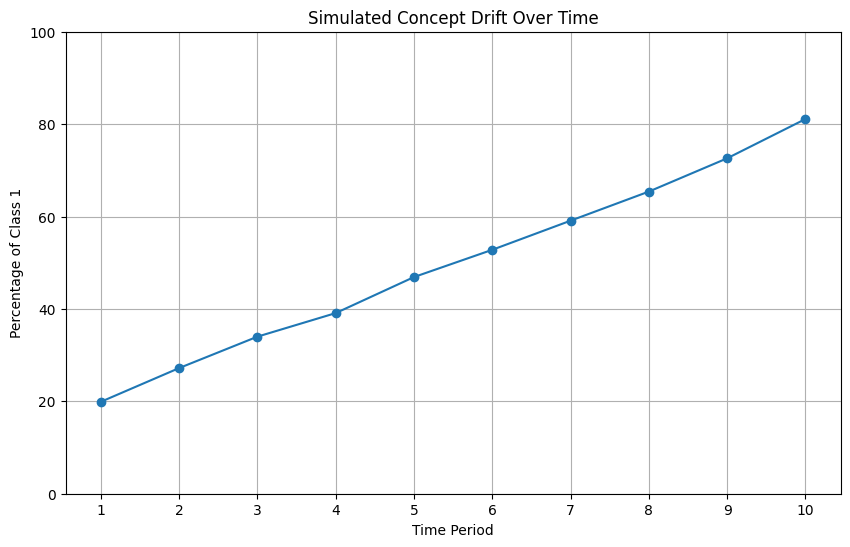

In [1]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set reproducibility
np.random.seed(42)

# Simulate 10 time periods
time_periods = 10
samples_per_period = 1000

# Simulate changing class distributions
# Start with 80% class 0, gradually increase class 1 to 80%
class_1_probs = np.linspace(0.2, 0.8, time_periods)

# Generate the data
data = []

for period, prob_1 in enumerate(class_1_probs, start=1):
    target = np.random.choice([0, 1], size=samples_per_period, p=[1 - prob_1, prob_1])
    df = pd.DataFrame({
        'time_period': period,
        'target': target
    })
    data.append(df)

# Combine all periods
drift_df = pd.concat(data)

# Calculate proportion of class 1 per period
drift_summary = drift_df.groupby('time_period')['target'].mean().reset_index()
drift_summary['target'] *= 100  # convert to percentage

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(drift_summary['time_period'], drift_summary['target'], marker='o', linestyle='-')
plt.title('Simulated Concept Drift Over Time')
plt.xlabel('Time Period')
plt.ylabel('Percentage of Class 1')
plt.grid(True)
plt.xticks(drift_summary['time_period'])
plt.ylim(0, 100)
plt.show()
